**Question:**


Can we group wines by their measurable chemical properties, and tell anything about how well they rank by wine experts? 


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

### **Loading the data**

In [2]:
data = pd.read_csv("winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### **Checking the Info and Summary Statistics**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- There are **1599 observations and 12 columns** in the data.
- All variables are of numeric data type.
- There is no missing data.
- There **aren't any variables that are of the object datatype or have unique names.** This minimizes the preprocessing we will need to do before proceeding to PCA analysis.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


- On average, the fixed acidity of the wines is 8.31 and pd was 3.31. 
- total sulfur dioxides has a meidan of 46.46 with a standard deviation of 32.89. 
- alcohol content is on average 10.4%
- Quality rating is out of 10 but the max score given was an 8 out of 10, and the minimum score was a 3 out of 10. 

fixed acidity
Skew : 0.98


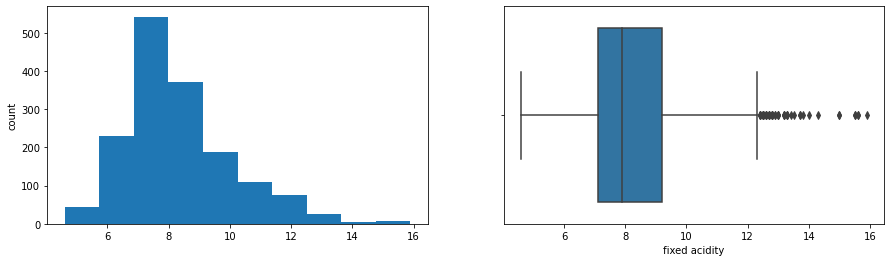

volatile acidity
Skew : 0.67


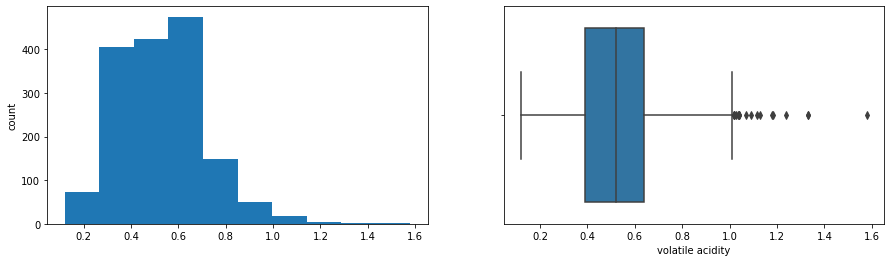

citric acid
Skew : 0.32


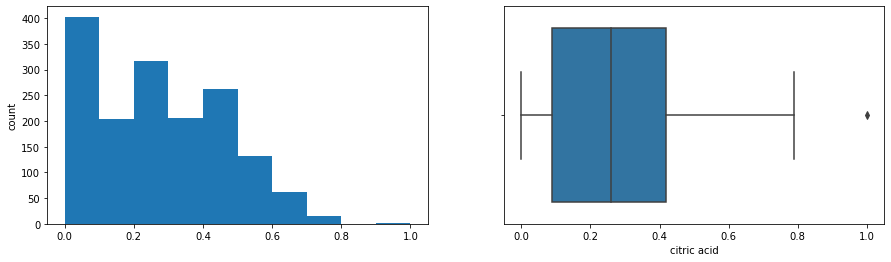

residual sugar
Skew : 4.54


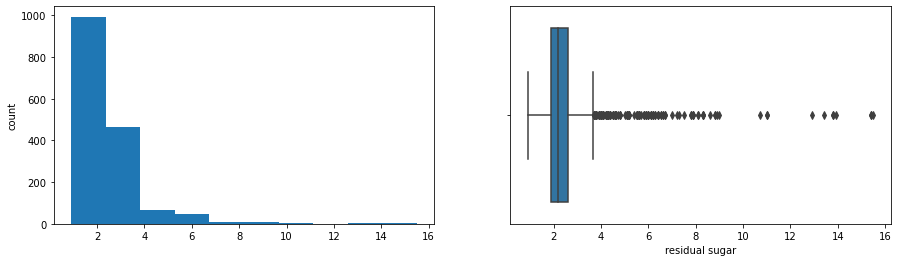

chlorides
Skew : 5.68


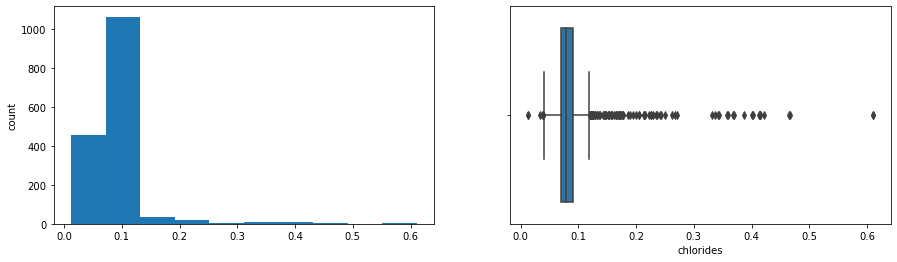

free sulfur dioxide
Skew : 1.25


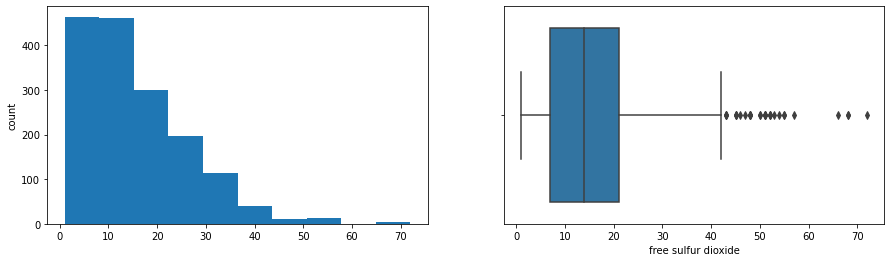

total sulfur dioxide
Skew : 1.52


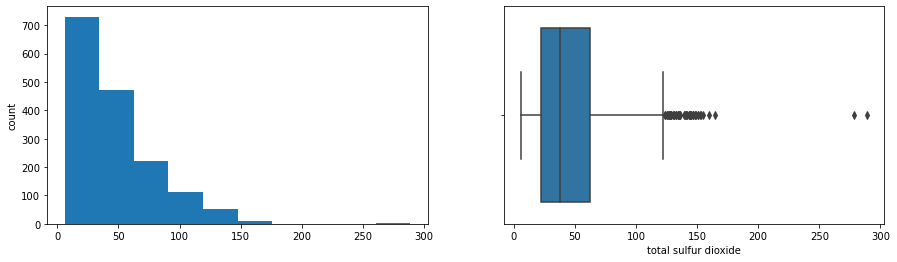

density
Skew : 0.07


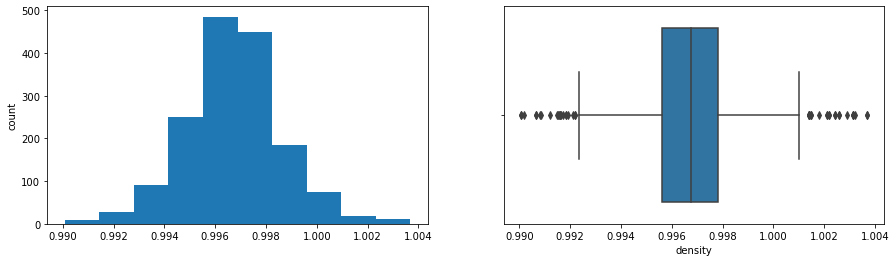

pH
Skew : 0.19


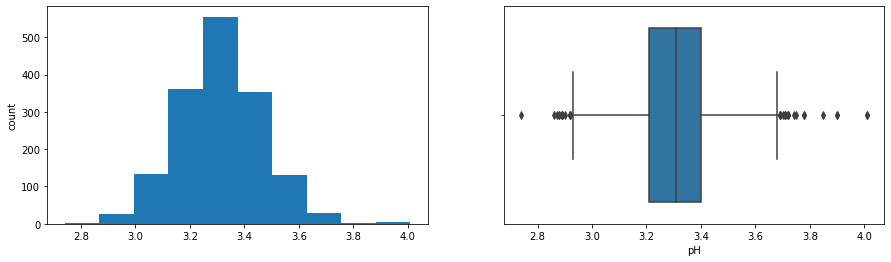

sulphates
Skew : 2.43


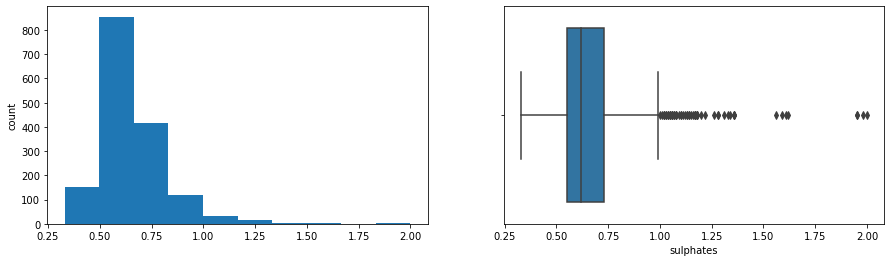

alcohol
Skew : 0.86


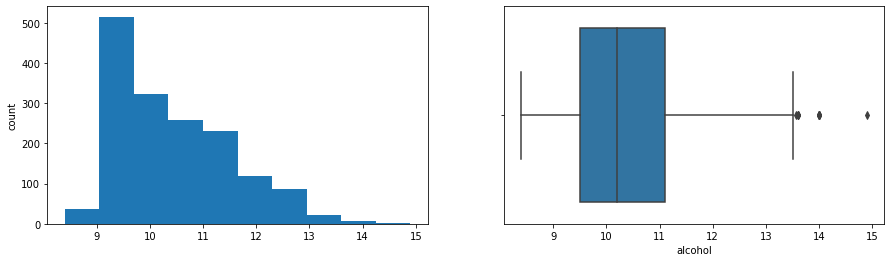

quality
Skew : 0.22


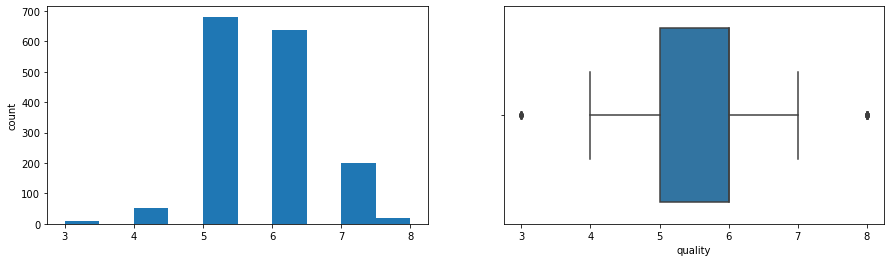

In [6]:
cont_cols = list(data.columns)

for col in cont_cols:

    print(col)
    
    print('Skew :',round(data[col].skew(),2))
    
    plt.figure(figsize = (15, 4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

- The distribution plots show that residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, and sulphates are highly right skewed (skew > 1). It is evident from the boxplots that all these variables have outliers.
- Density and pH have what appears to be a normal distribution. 
- Fixed acidity, volatile acidity, and alcohol seem to have a moderate right skew.
- The majority of the wines recieved a quality score of 5 or 6. 

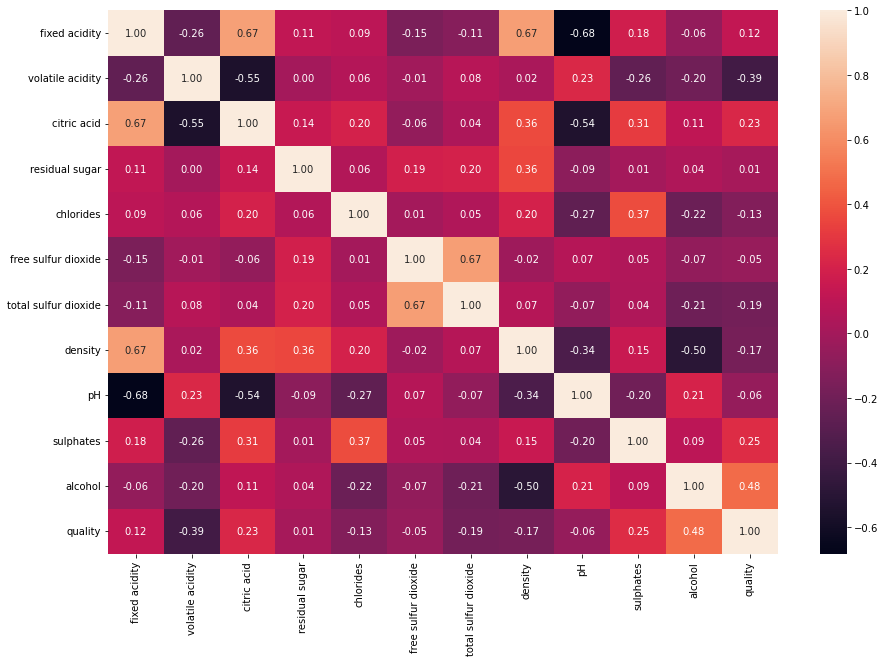

In [7]:
plt.figure(figsize = (15, 10))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

plt.show()

- We can see a **moderate positive correlation** among the following variables: 
    1. Citric acid and Fixed Acidity
    2. Density and Fixed Acidity
    3. Total Sulfur Dioxide and Free Sulfur Dioxide

- We can see a **moderate negative correlation** among the following variables:
    1. pH and Fixed acidity
    2. Citric acid and Volatile acidity 
    3. pH and citric acid
    4. Alcohol and Density 
    
There is a low positive correlation between alcohol content and quality, and a low negative correlation between volatile acidity and quality. These are two strongest correlations with regard to quality. The moderate correlations all relate to the chemistry of the wine. For example, higher alcohol content means lower density because alcohol is less dense than water.

### **Scaling the data**

In [8]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [9]:
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


### **Principal Component Analysis**

In [10]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding principal components for the data
pca = PCA(n_components = n, random_state = 1)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

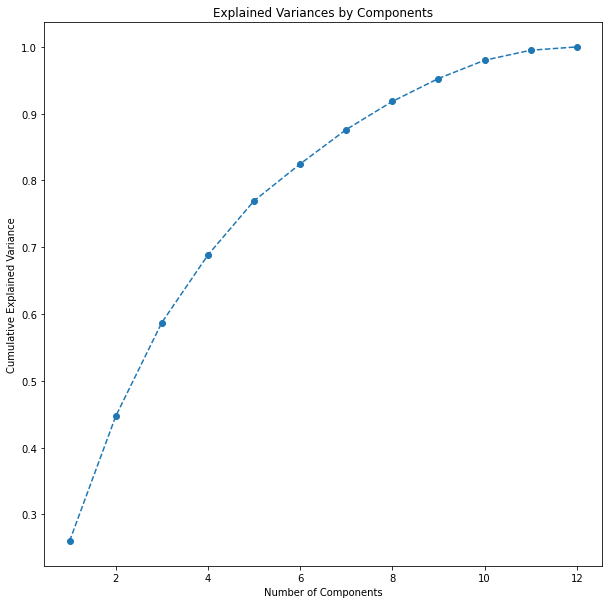

In [11]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 13), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

- We can see that out of the original 12 features, we have reduced the number of features through PCA to 4 principal components. The first four principal components explain approximately 68% of the original variance.

- So that is about a **66% reduction in the dimensionality of the dataset with only a loss of 32% in variance**.

Now, let us look at these **principal components as a linear combination of the original features**.

In [12]:
pc_comps = ['PC1', 'PC2', 'PC3', 'PC4']

data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2), index = pc_comps, columns = data_scaled.columns)


In [13]:
def color_high(val):
    
    if val < -0.25:                   
        return 'background: pink'
    
    elif val > 0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
fixed acidity,0.490000,-0.000000,-0.160000,-0.230000
volatile acidity,-0.270000,0.340000,-0.230000,0.040000
citric acid,0.470000,-0.140000,0.100000,-0.060000
residual sugar,0.140000,0.170000,0.240000,-0.380000
chlorides,0.200000,0.190000,-0.030000,0.650000
free sulfur dioxide,-0.050000,0.260000,0.620000,-0.030000
total sulfur dioxide,0.000000,0.360000,0.540000,-0.030000
density,0.370000,0.330000,-0.170000,-0.200000
pH,-0.430000,-0.070000,0.070000,-0.010000
sulphates,0.250000,-0.110000,0.210000,0.560000


- The first principal component, PC1, seems to be related to high fixed acidity, density, and citric acid, but low pH and volatile acidity. The **first principal component seems to capture wines that are generally more acidic, however have less volatile acidity which is associated with the smell of vinegar and potently spoilage or over oxidation** PC1 has a weak positive relationship with quality.


- The second principal component, PC2, seems to be related to higher volatile acidity, free sulfur dioxide, total sulfur dioxide and density, and lower alcohol content and quality. The **second principal component seems to capture wines that are not as high quality, due to the higher volatile acidity content and sulfur dioxide content, and lower quality score.** PC2  has a moderate negative relationship with quality.


- **The third principal component, PC3, seems to be related to higher sulfur dioxide content** It is associated with higher free and total sulfur dioxide. Adding sulfur dioxide to wine helps preserve the wine and prevent oxidation and browning. PC3  has a weak positive relationship with quality.


- **The fourth principal component, PC4, seems to be related to higher chlorides and sulfates and lower residual sugars.** PC4 is associated with high levels of chlorides, which indicates the level of salt in wine and sulfates, which is a preservative in wine. PC4 is associated with lower residual sugars, i.e. sweetness.

**We can also visualize the data in 2 dimensions, using the first two principal components.**

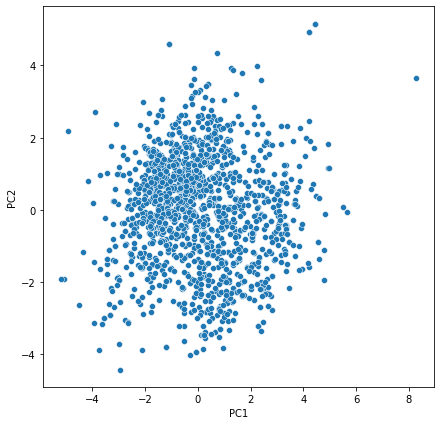

In [14]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[0], y = data_pca1[1])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

**Let's try adding hue for quality to the scatter plot**

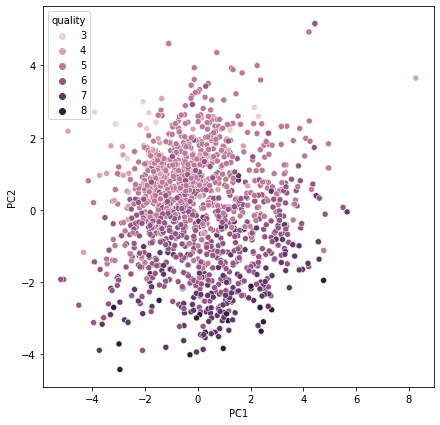

In [15]:
df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))

sns.scatterplot(x = df_concat[0], y = df_concat[1], hue = df_concat['quality']) 
plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

- The quality of the wine appears to be spread along PC2. 
- the wines do appear to overlap groups and do not form a clear pattern. 

Let's try looking at PC2 and PC3 because we know that PC3 has a stronger positive relationship to wine quality than PC1. 

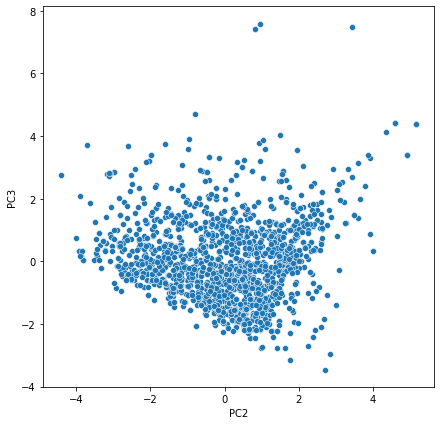

In [16]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[1], y = data_pca1[2])

plt.xlabel("PC2")

plt.ylabel("PC3")

plt.show()

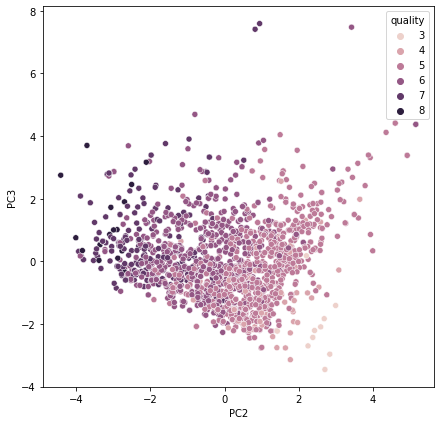

In [17]:
df_concat = pd.concat([data_pca1, data], axis = 1)

plt.figure(figsize = (7, 7))

sns.scatterplot(x = df_concat[1], y = df_concat[2], hue = df_concat['quality'])   # Create a scatter plot with x = 0 and y = 1 using df_concat dataframe

plt.xlabel("PC2")

plt.ylabel("PC3")

plt.show()

**Observations:**
- The number of cylinders of cars in this dataset is clearly distributed along PC1. As stated above PC1 seems to be related to high values of cylinders, displacement, horsepower, and weight and lower values for miles per gallon. 
- Here we see cylinders in three distict groups spread vertically because they vary along PC1 more than they vary along PC2. 
- PC2 is related to cars with older model years. Here we can see that those older cars are more likely to have less cylinders. However, this relationship is not very clearly defined. 

In [18]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x[1]
    
    second_component = x[2]
    
    if (second_component < -1.75) and (first_component > 1.5):
        return 'very bad'
    
    elif (second_component > 0.5) and (first_component < -2):
        return 'very good'
    
    else: 
        return 'decent'

In [19]:
data_pca1['groups'] = data_pca1.apply(grouping, axis = 1)

<AxesSubplot:xlabel='1', ylabel='2'>

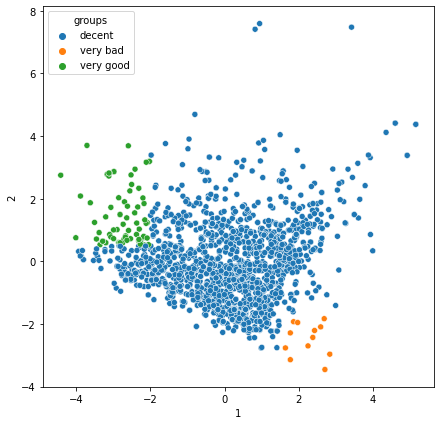

In [20]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 1, y = 2, data = data_pca1, hue = 'groups')

**Now, let's try to visualize the properties of these four groups with respect to all the numeric variables in the data.** 

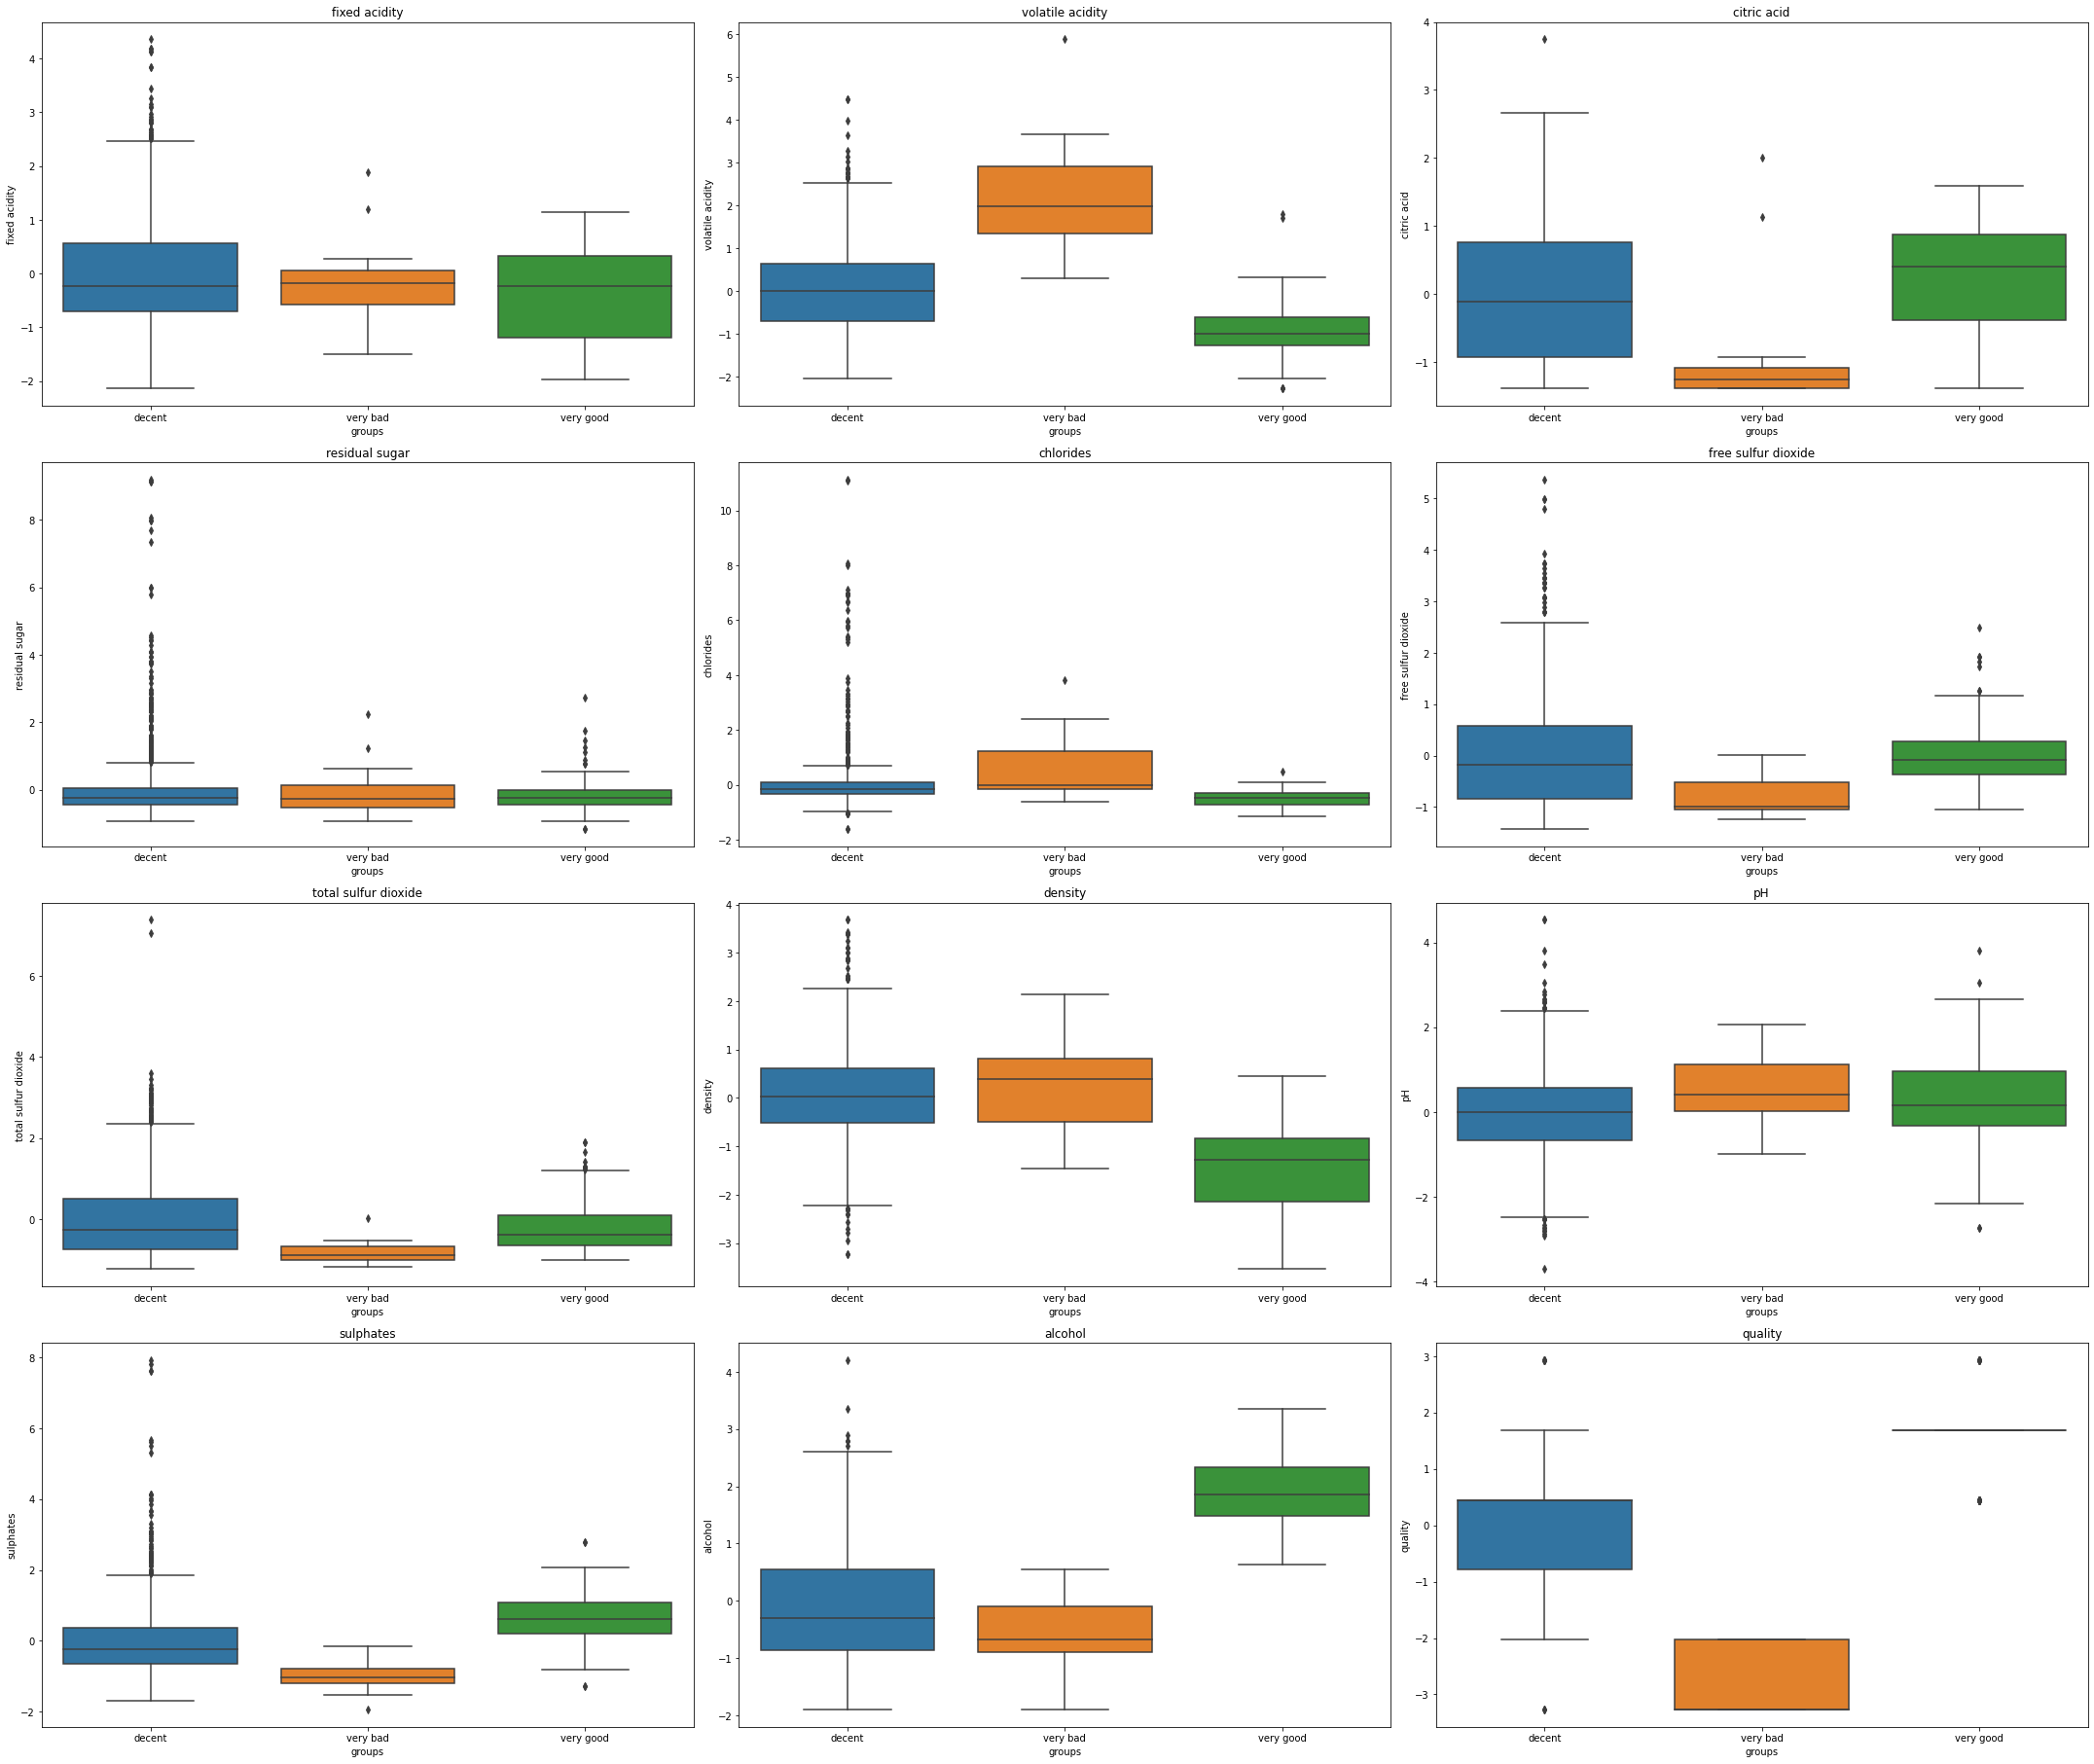

In [21]:
all_col = data_scaled.columns[:].tolist()

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)
    
    sns.boxplot(y=data_scaled[variable], x=data_pca1['groups'])
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

There are three groups in the data. Each group has a different set of characteristics.


- **very bad** These wines are characterized by higher levels of chlorides, and volatile acidity, and lower than average levels of free sulfur dioxide, total sulfur dioxide, sulfates and citric acid. 

- **very good** These wines are characterized by higher levels of sulfates, citric acid, free sulfur dioxide, and alcohol content, and lower levels of volatile acidity, chlorides, and density.

- **decent** Decent wines fall in between the two extremes and span a wide variety of wines. In some variables such as free sulfur dioxide, sulfates, and chlorides, the decent wines appear more similar to the very good wines. For other variables such as alcohol content and density, the decent wines are more similar to the very bad wines. 
